In [1]:
import sys
from pathlib import Path

notebook_dir = Path.cwd()
project_root = notebook_dir.parent
sys.path.insert(0, str(project_root))

print(f"Project root added to sys.path: {str(project_root)}")
print(f"Current sys.path: {sys.path}")

import dagmin

Project root added to sys.path: c:\quack_pot\science\dag_min
Current sys.path: ['c:\\quack_pot\\science\\dag_min', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.3312.0_x64__qbz5n2kfra8p0\\python313.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.3312.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.3312.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.3312.0_x64__qbz5n2kfra8p0', 'c:\\quack_pot\\science\\dag_min\\.notebook-env', '', 'c:\\quack_pot\\science\\dag_min\\.notebook-env\\Lib\\site-packages']


In [2]:
xor_model: dagmin.models.StandardNeuralDAG = dagmin.models.StandardNeuralDAG(dagmin.models.StandardNeuralDAGCreateInfo(
    input_node_count=2,
    hidden_node_count=5,
    output_node_count=1
))

xor_data: list[list[float]] = [
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
]

xor_targets: list[list[float]] = [
    [0.0],
    [1.0],
    [1.0],
    [0.0],
]

print("Training XOR DAG Model...")
xor_model.train(dagmin.models.StandardNeuralDAGTrainInfo(
    input_data=xor_data,
    output_data=xor_targets,
    epochs=5000,
    epoch_print_cadence=500,
    learning_rate=0.05,
    lambda_edges=1e-2,
    lambda_nodes=1e-2,
    node_strength_sharpness=10.0,
))

print("\nXOR Truth Table:\n(Inputs) - (Predicted, Truth)\n------------------------------")
for datum, target in zip(xor_data, xor_targets):
    output: list[float] = xor_model.evaluate(datum)

    table_row: str = "("
    for in_value in datum[:-1]:
        table_row += f"{in_value:.0f}, "
    table_row += f"{datum[-1]:.0f}) - "

    for out_value, target_value in zip(output, target):
        table_row += f"({out_value:.4f}, {target_value:.0f})"

    print(table_row)

Training XOR DAG Model...
StaticSparseDAG Training (Epoch = 0; Loss = 5.5135)
StaticSparseDAG Training (Epoch = 500; Loss = 2.9336)
StaticSparseDAG Training (Epoch = 1000; Loss = 2.9100)
StaticSparseDAG Training (Epoch = 1500; Loss = 2.4373)
StaticSparseDAG Training (Epoch = 2000; Loss = 1.5498)
StaticSparseDAG Training (Epoch = 2500; Loss = 1.2943)
StaticSparseDAG Training (Epoch = 3000; Loss = 1.3021)
StaticSparseDAG Training (Epoch = 3500; Loss = 1.3923)
StaticSparseDAG Training (Epoch = 4000; Loss = 1.5150)
StaticSparseDAG Training (Epoch = 4500; Loss = 1.6472)

XOR Truth Table:
(Inputs) - (Predicted, Truth)
------------------------------
(0, 0) - (0.0602, 0)
(0, 1) - (0.9062, 1)
(1, 0) - (0.9054, 1)
(1, 1) - (0.1289, 0)


XOR DAG Graph
------------------------------
Input Node Count = 2
Hidden Node Count = 1
Output Node Count = 1

Total Node Count = 4


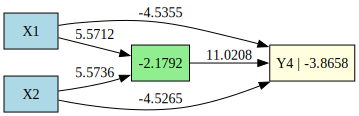

In [3]:
xor_dag: dagmin.graphs.NeuralGraph = xor_model.extractDAG()

print("XOR DAG Graph\n------------------------------")
print(f"Input Node Count = {xor_dag.getInputNodeCount()}")
print(f"Hidden Node Count = {xor_dag.getHiddenNodeCount()}")
print(f"Output Node Count = {xor_dag.getOutputNodeCount()}")
print(f"\nTotal Node Count = {xor_dag.getTotalNodeCount()}")

xor_dag.renderGraph("xor_dag")